In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score


In [2]:
df = pd.read_csv("datasets/feature_engineered_aqi_data_local.csv")

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df = df.set_index('date').sort_index()

In [5]:
print("--- Data loaded and converted to time series ---")
print(df.head())
print("-" * 30)

--- Data loaded and converted to time series ---
                                 city  pm10  pm2_5  carbon_monoxide  \
date                                                                  
2023-06-01 06:00:00+00:00       dhaka  51.3   34.1            369.0   
2023-06-01 06:00:00+00:00  chittagong  48.4   30.7            288.0   
2023-06-01 06:00:00+00:00      khulna  33.1   20.8            263.0   
2023-06-01 07:00:00+00:00       dhaka  50.2   32.5            381.0   
2023-06-01 07:00:00+00:00  chittagong  49.6   30.6            281.0   

                           nitrogen_dioxide  sulphur_dioxide  ozone  \
date                                                                  
2023-06-01 06:00:00+00:00              17.9              8.6   44.0   
2023-06-01 06:00:00+00:00               8.4              4.7   61.0   
2023-06-01 06:00:00+00:00               5.6              4.6   65.0   
2023-06-01 07:00:00+00:00              19.3             10.4   53.0   
2023-06-01 07:00:00+00:00  

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
df['city_encoded'] = le.fit_transform(df['city'])

In [8]:
X = df[[col for col in df.columns if col not in ["us_aqi", "city"]]]
y = df["us_aqi"]

In [9]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=43)

In [10]:
def evaluate_sklearn_model(model, X_test, y_test):
    """
    Calculates MAE, MAPE, and R-squared for a trained Scikit-learn regression model.

    Args:
        model: The trained Scikit-learn model (e.g., RandomForestRegressor).
        X_test (pd.DataFrame or np.ndarray): The test features.
        y_test (pd.Series or np.ndarray): The actual target values for the test set.

    Returns:
        dict: A dictionary containing the MAE, MAPE, and R-squared scores.
    """
    # 1. Get predictions from the model
    y_pred = model.predict(X_test)

    # 2. Calculate the metrics
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
    r2 = r2_score(y_test, y_pred)

    # 3. Store scores in a dictionary
    scores = {
        'MAE': mae,
        'MAPE (%)': mape,
        'R-squared': r2
    }
    
    return scores

## RANDOM FOREST REGRESSOR

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
model_scores = evaluate_sklearn_model(forest, X_test, y_test)

In [13]:
print("--- Random Forest Model Performance ---")
for metric, value in model_scores.items():
    print(f"{metric}: {value:.4f}")

--- Random Forest Model Performance ---
MAE: 8.1930
MAPE (%): 9.6890
R-squared: 0.9376


In [14]:
pred = forest.predict(X_test)

C:\Users\stasn\AppData\Local\Temp\ipykernel_7544\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='us_aqi', ylabel='Density'>

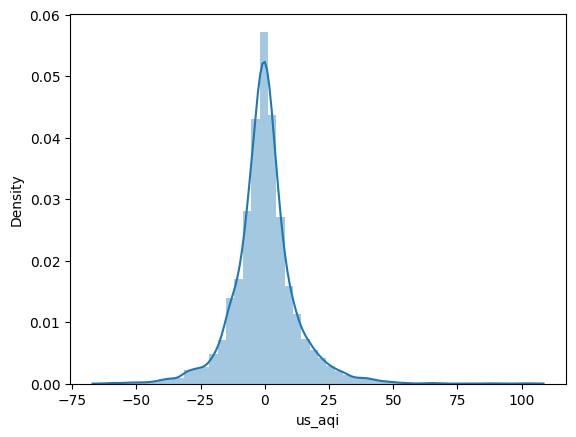

In [15]:
sns.distplot(y_test - pred)

--- Plotting Actual vs. Predicted Values ---


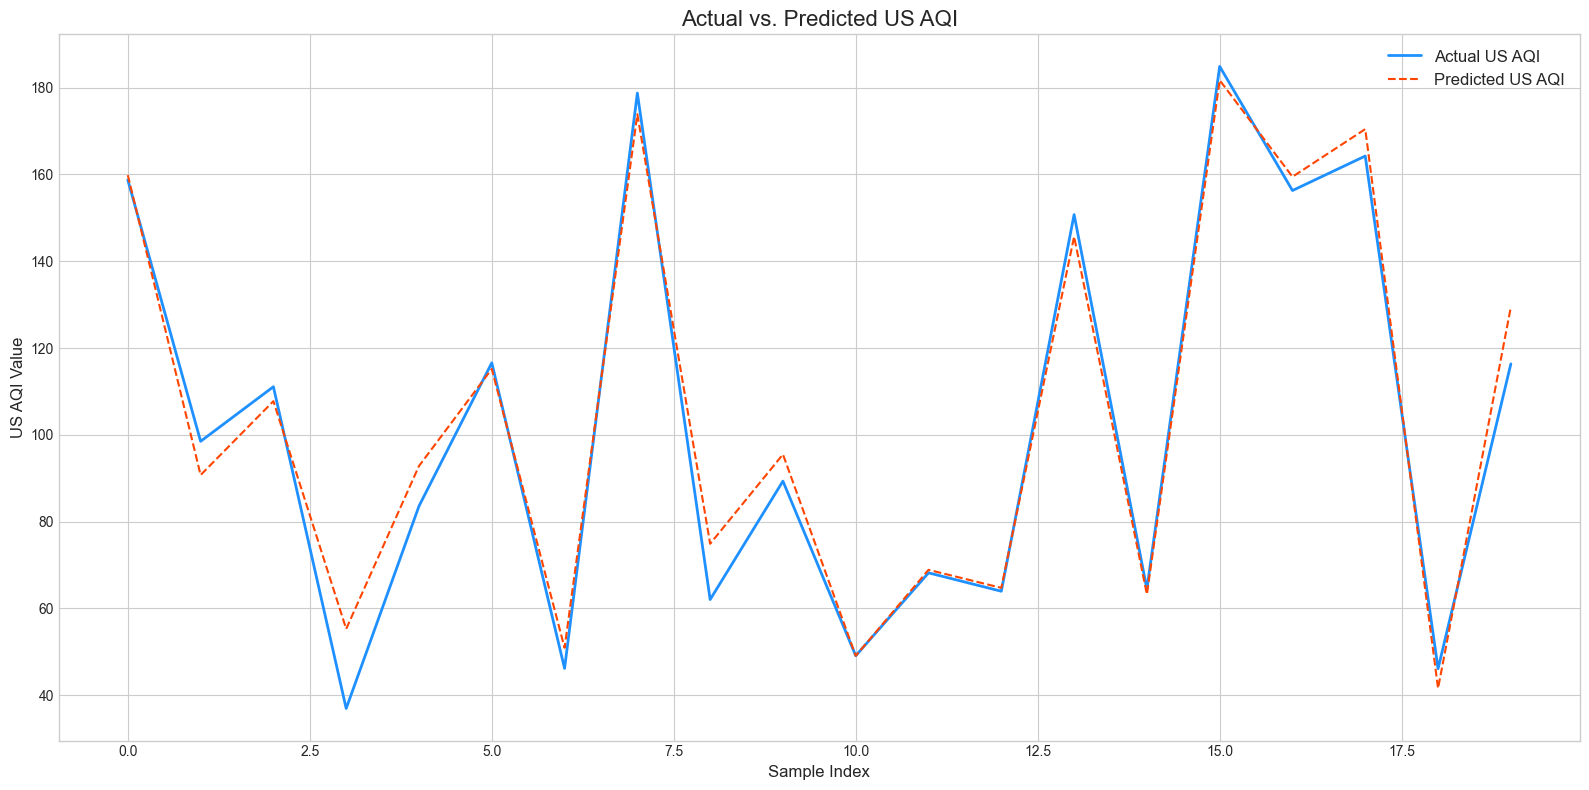

In [16]:
y_pred = forest.predict(X_test)
print("--- Plotting Actual vs. Predicted Values ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))

sample_size = 20
actual_sample = y_test.iloc[:sample_size].values
predicted_sample = y_pred[:sample_size]

plt.plot(actual_sample, label='Actual US AQI', color='dodgerblue', linewidth=2)
plt.plot(predicted_sample, label='Predicted US AQI', color='orangered', linestyle='--')

plt.title(f'Actual vs. Predicted US AQI', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('US AQI Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
test_df = pd.read_csv("datasets/feature_engineered_aqi_data_local_recent.csv")

In [38]:
test_df = test_df.set_index('date').sort_index()

In [39]:
le = LabelEncoder()
test_df['city_encoded'] = le.fit_transform(test_df['city'])

In [40]:
X_test_recent = test_df[[col for col in test_df.columns if col not in ["us_aqi", "city"]]]
y_test_recent = test_df["us_aqi"]

--- Plotting Actual vs. Predicted Values ---


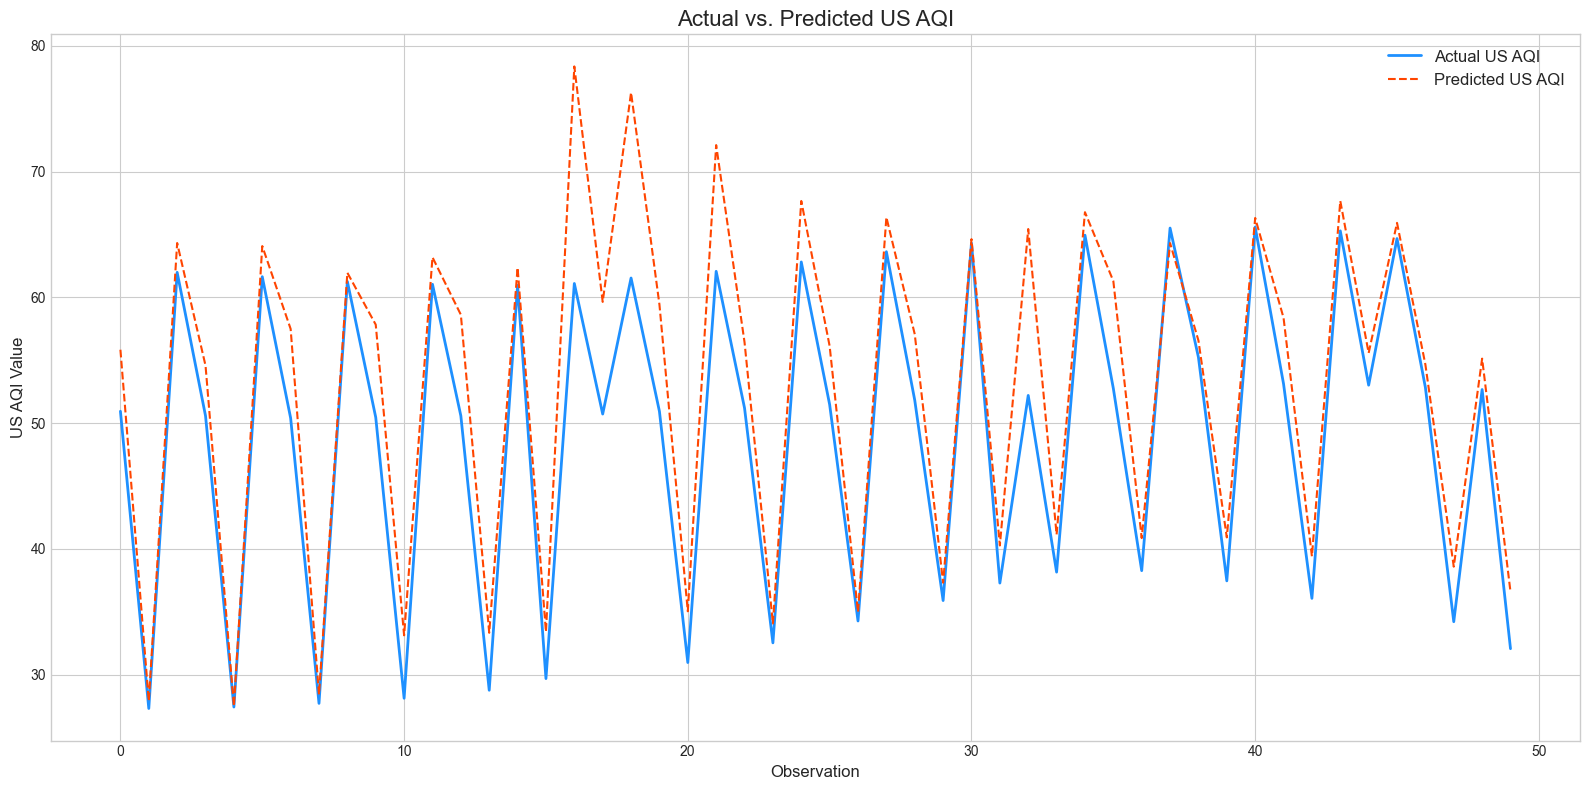

In [47]:
y_pred_recent = forest.predict(X_test_recent)
print("--- Plotting Actual vs. Predicted Values ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(16, 8))

sample_size = 50
actual_sample = y_test_recent.iloc[:sample_size].values
predicted_sample = y_pred_recent[:sample_size]

plt.plot(actual_sample, label='Actual US AQI', color='dodgerblue', linewidth=2)
plt.plot(predicted_sample, label='Predicted US AQI', color='orangered', linestyle='--')

plt.title(f'Actual vs. Predicted US AQI', fontsize=16)
plt.xlabel('Observation', fontsize=12)
plt.ylabel('US AQI Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
model_scores_recent = evaluate_sklearn_model(forest, X_test_recent, y_test_recent)

In [49]:
print("--- Random Forest Model Performance on Recent Data ---")
for metric, value in model_scores_recent.items():
    print(f"{metric}: {value:.4f}")

--- Random Forest Model Performance on Recent Data ---
MAE: 9.4134
MAPE (%): 18.6966
R-squared: 0.5939
